# Portfolio Construction and Analysis

## Objectives
Just reasearch and analyze different datasets

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import portfolio_construction_toolkit.all as pc
import sys
sys.path.insert(0, 'C:\\Users\\user\\Documents\\GitHub\\Portfolio-Construction-and-Analysis\\python_files')
import functions_1 as fnc
import edhec_risk_kit_127 as erk

In [2]:
r12 = pd.read_csv(r'C:\Users\user\Documents\GitHub\Portfolio-Construction-and-Analysis\Data\cleaned_data\historical_returns_data_1.csv', parse_dates=True, index_col='Date')

In [3]:
fnc.start_dates(r12)

{'S&P 500': Timestamp('1928-01-03 00:00:00'),
 'Vanguard High Yield Corporate Fund': Timestamp('1980-01-03 00:00:00'),
 'Vanguard Small Cap Index Fund': Timestamp('1980-01-03 00:00:00'),
 'Vanguard Value Index Fund': Timestamp('1992-11-02 00:00:00'),
 'SPDR S&P 500 ETF Trust': Timestamp('1993-02-01 00:00:00'),
 'Vanguard Total Intl Stock Idx Fund': Timestamp('1996-04-30 00:00:00'),
 'Vanguard Mid Cap Index Fund': Timestamp('1998-05-22 00:00:00'),
 'Vanguard Small Cap Value Index Fund': Timestamp('1998-05-22 00:00:00'),
 'Vanguard Real Estate Index Fund': Timestamp('2004-09-30 00:00:00'),
 'SPDR Gold Shares': Timestamp('2004-11-19 00:00:00'),
 'Vanguard Emerging Markets Stock Index Fund': Timestamp('2005-03-11 00:00:00'),
 'iShares J.P. Morgan USD Emerging Markets Bond ETF': Timestamp('2007-12-20 00:00:00')}

In [4]:
r12 = pc.change_timeframe(r12, 'M')
r12 = r12.loc['2007':]
r12.shape

(200, 12)

In [5]:
er12 = pc.annualize_returns(r12, 12)

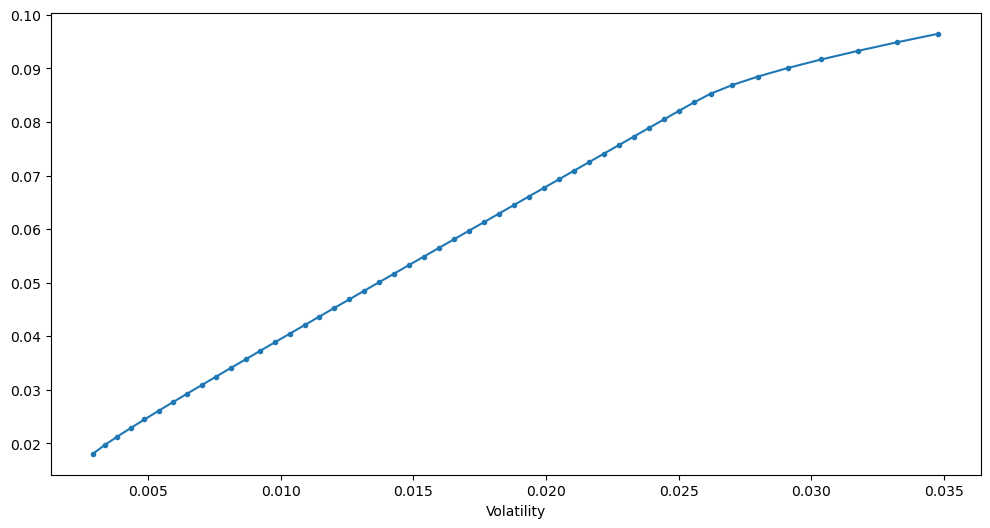

In [6]:
bct_r12 = pc.plot_ef(50, er12, r12.cov())

<Axes: >

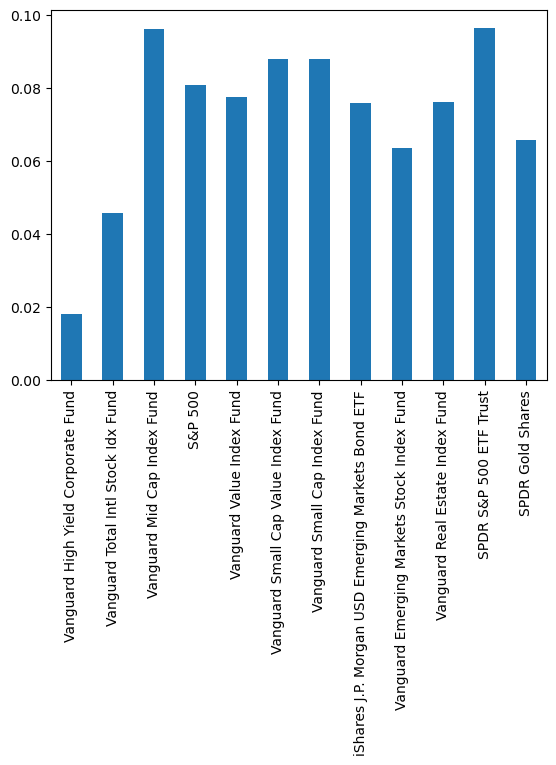

In [7]:
pc.annualize_returns(r12, 12).plot(kind='bar')

In [8]:
r11 = r12.drop(columns='Vanguard High Yield Corporate Fund')

In [9]:
er11 = er12.drop('Vanguard High Yield Corporate Fund')

<Axes: xlabel='Volatility'>

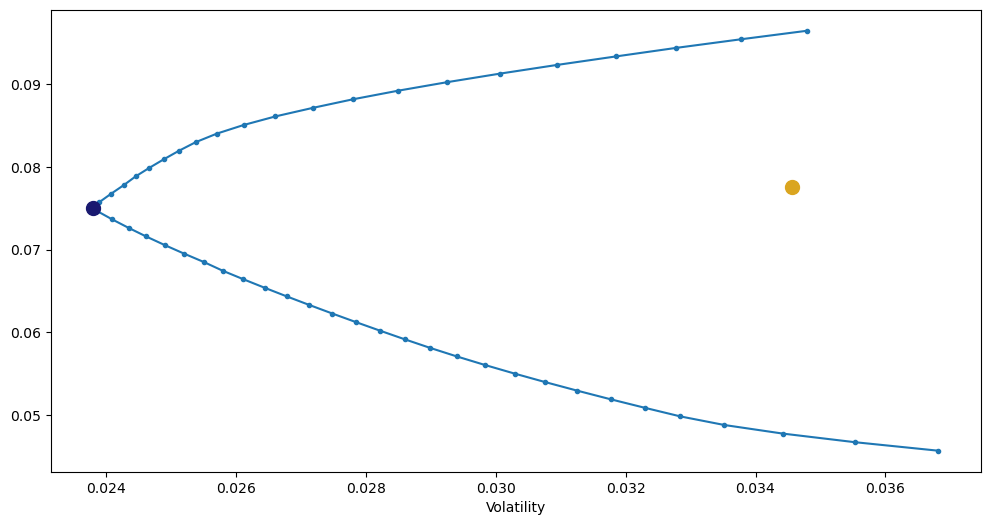

In [10]:
pc.plot_ef(50, er11, r11.cov(), show_ew=True, show_gmv=True, riskfree_rate=0.02)

In [44]:
pc.gmv(r11.cov(), er11)['Weights']

0    [2.9942264510175394e-13, 3.385199494121874e-12...
Name: Weights, dtype: object

In [95]:
bc = pc.combined_backtesting_result(r11, ['MSR', 'EW', 'GMV', 'TR'], 12, 36, 0.03, 1.5, 3, weights_column=True, starting_step=36,
                                    target_returns=[0.06, 0.08])

In [100]:
pc.summary_stats(bc.xs('Returns', axis=1, level=1), 12, 0.03)

,Annualized Returns,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic Cvar (5%),Sharpe Ratio,Max Drawdown,Time Period
Maximum Sharpe Ratio,0.140448,0.139571,-0.156162,4.225117,0.055027,0.077562,0.770085,-0.229455,<-163 * MonthEnds>
Equally Weighted,0.092116,0.104196,-0.437944,4.231835,0.044383,0.062974,0.580112,-0.167052,<-163 * MonthEnds>
Global Minimum Variance,0.098871,0.099928,-0.694979,6.458589,0.042413,0.058063,0.670701,-0.195645,<-163 * MonthEnds>
Target Returns 6.0%,0.065420,0.130193,-2.353076,17.610114,0.065705,0.089340,0.264606,-0.362045,<-163 * MonthEnds>
Target Returns 8.0%,0.086044,0.113648,-0.896504,7.172420,0.051440,0.073815,0.479837,-0.208235,<-163 * MonthEnds>


In [96]:
bc_w = bc.xs('Weights', axis=1, level=1)
bc_w = pc.weights_change(bc_w)
bc_w

Maximum Sharpe Ratio                              \
        Vanguard Total Intl Stock Idx Fund Vanguard Mid Cap Index Fund   
2010-01                       3.595892e-17                4.302928e-16   
2010-02                       3.595892e-17                4.302928e-16   
2010-03                       3.595892e-17                4.302928e-16   
2010-04                       0.000000e+00                1.690911e-16   
2010-05                       0.000000e+00                1.690911e-16   
...                                    ...                         ...   
2023-04                       0.000000e+00                6.530220e-17   
2023-05                       0.000000e+00                6.530220e-17   
2023-06                       0.000000e+00                6.530220e-17   
2023-07                       0.000000e+00                2.663991e-16   
2023-08                       0.000000e+00                2.663991e-16   

                                                 \
              S&P 500 Vanguard Value Index Fund   
2010-01  3.813033e-17                  0.000000   
2010-02  3.813033e-17                  0.000000   
2010-03  3.813033e-17                  0.000000   
2010-04  0.000000e+00                  0.000000   
2010-05  0.000000e+00                  0.000000   
...               ...                       ...   
2023-04  0.000000e+00                  1.074536   
2023-05  0.000000e+00                  1.074536   
2023-06  0.000000e+00                  1.074536   
2023-07  0.000000e+00                  0.983245   
2023-08  0.000000e+00                  0.983245   

                                                                           \
        Vanguard Small Cap Value Index Fund Vanguard Small Cap Index Fund   
2010-01                        4.084464e-18                  0.000000e+00   
2010-02                        4.084464e-18                  0.000000e+00   
2010-03                        4.084464e-18                  0.000000e+00   
2010-04                        0.000000e+00                  4.773318e-17   
2010-05                        0.000000e+00                  4.773318e-17   
...                                     ...                           ...   
2023-04                        3.569675e-01                  0.000000e+00   
2023-05                        3.569675e-01                  0.000000e+00   
2023-06                        3.569675e-01                  0.000000e+00   
2023-07                        5.167554e-01                  0.000000e+00   
2023-08                        5.167554e-01                  0.000000e+00   

                                                           \
        iShares J.P. Morgan USD Emerging Markets Bond ETF   
2010-01                                      3.980994e-01   
2010-02                                      3.980994e-01   
2010-03                                      3.980994e-01   
2010-04                                      5.146493e-01   
2010-05                                      5.146493e-01   
...                                                   ...   
2023-04                                      2.978372e-17   
2023-05                                      2.978372e-17   
2023-06                                      2.978372e-17   
2023-07                                      0.000000e+00   
2023-08                                      0.000000e+00   

                                                    \
        Vanguard Emerging Markets Stock Index Fund   
2010-01                               0.000000e+00   
2010-02                               0.000000e+00   
2010-03                               0.000000e+00   
2010-04                               7.893839e-17   
2010-05                               7.893839e-17   
...                                            ...   
2023-04                               4.374153e-17   
2023-05                               4.374153e-17   
2023-06                               4.374153e-17   
2023-

In [97]:
import matplotlib.ticker as mtick

In [98]:
df.columns[0][0]

'V'

<function matplotlib.pyplot.show(close=None, block=None)>

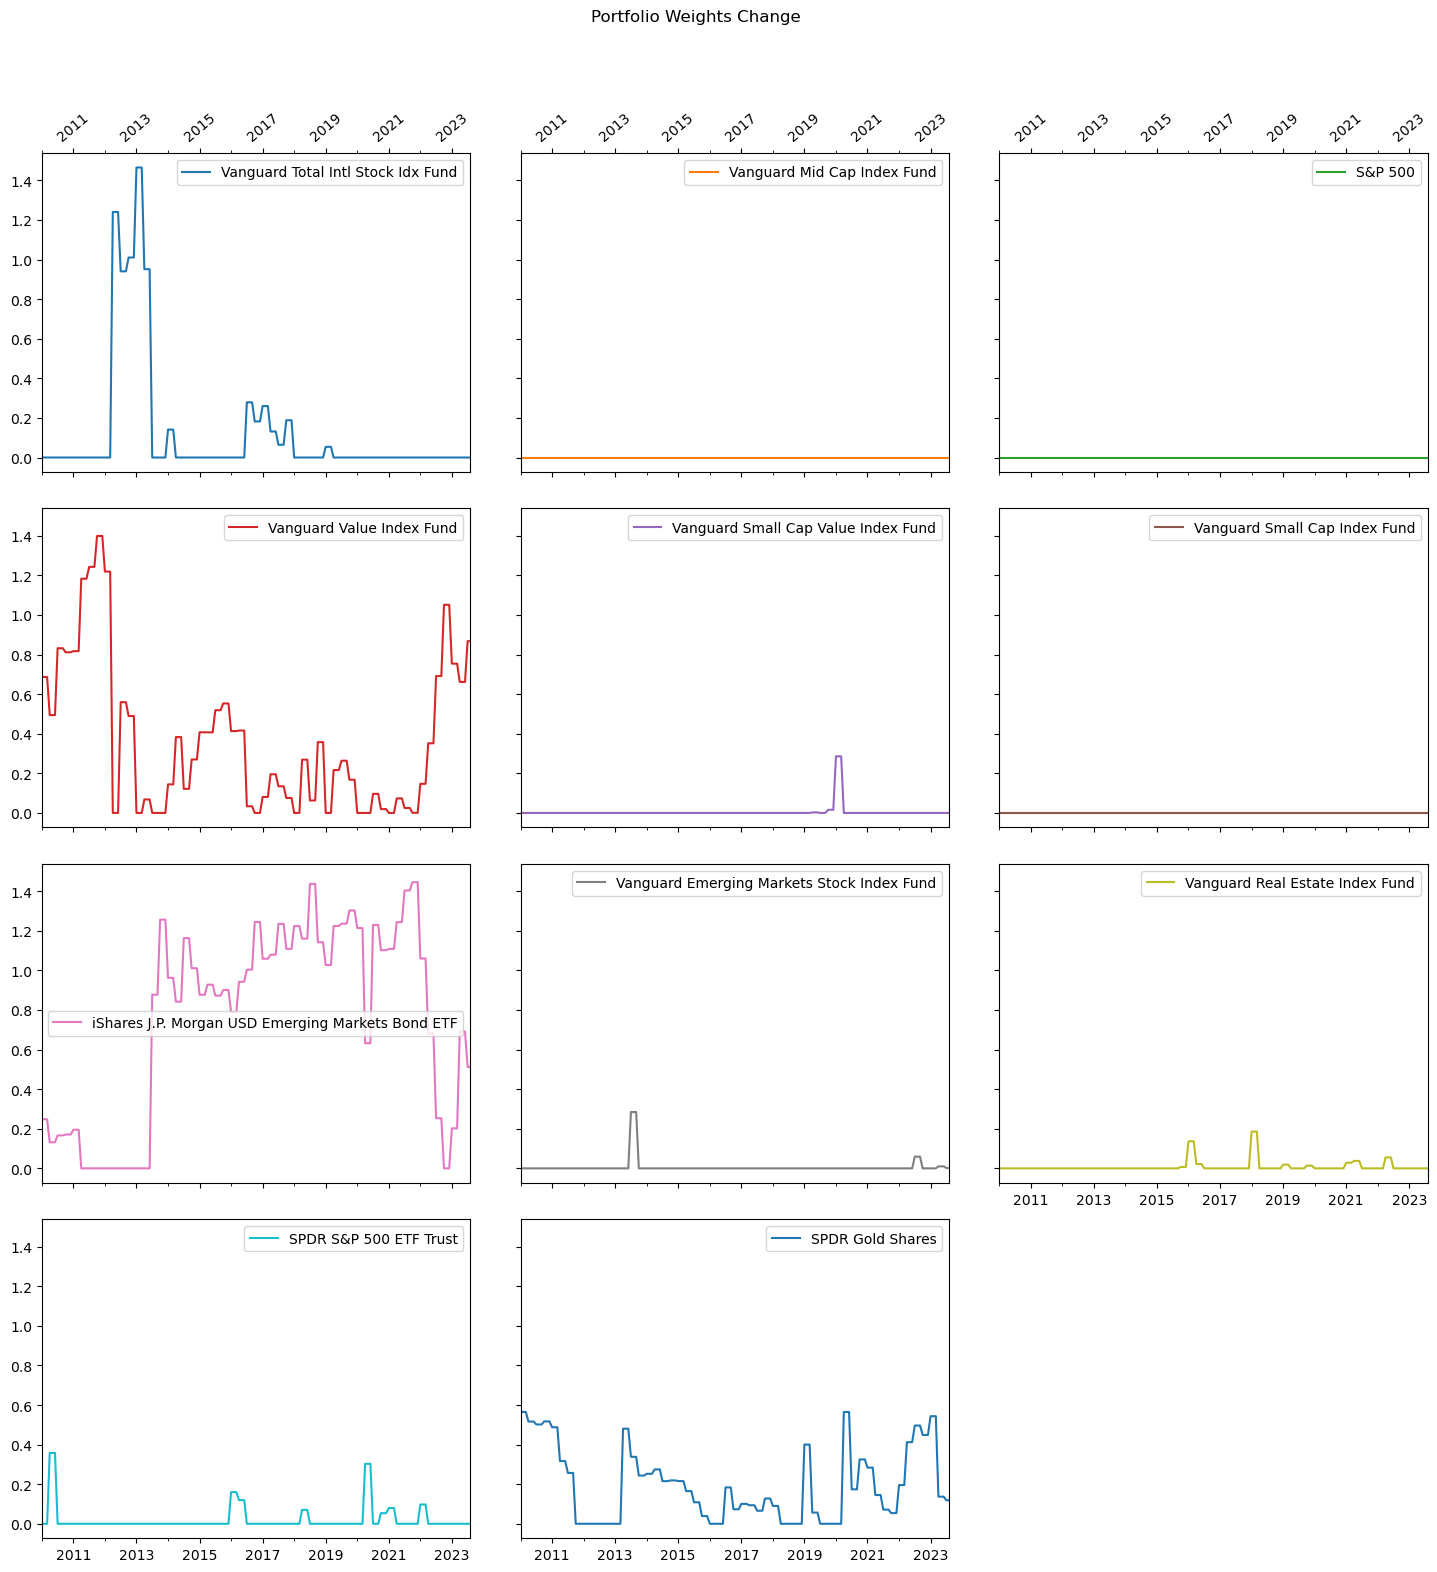

In [101]:
df = bc_w['Target Returns 8.0%']
n = len(df.columns)
col = 3 #specify the number of columns for the plot
row = int(np.ceil(n/col)) #specify the number of rows
fig_hei = row * 4 #specify height for the plot
fig_wid = col * 5 #specify width for the lot

ax = df.plot(subplots=True, figsize=(fig_wid, fig_hei), sharey=True, sharex=True, layout=(row, col),
                                       title='Portfolio Weights Change')

for i in range(col):
    ax[0,i].xaxis.set_tick_params(which='both', top = True, labeltop=True, labelrotation=40)

fig = ax[0,0].get_figure()
fig.tight_layout()
fig.subplots_adjust(top=0.89)

plt.show